# Computing convergence of the replicates

## Import libraries

In [1]:
# %matplotlib notebook
#  add Python-loader repo to the path 
import sys
sys.path.insert(0, '../Python-loader/')
from pyMCDS import pyMCDS

import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.integrate import odeint

## Define cell cycle model

In [2]:
# CELL CYCLE MODELS
### advanced_Ki67_cycle_model = 0
### basic_Ki67_cycle_model = 1
### flow_cytometry_cycle_model = 2
### live_apoptotic_cycle_model = 3
### total_cells_cycle_model = 4
### live_cells_cycle_model = 5 
### flow_cytometry_separated_cycle_model = 6
### cycling_quiescent_model = 7
cycle_model = 1

# output_folder = "output_Live/"
output_folder = "output_Ki67_Basic/"
# output_folder = "output_Ki67_Advanced/"
# output_folder = "output_Flow_Cytometry/"
# output_folder = "output_Separated_Flow_Cytometry/"

## List output folders

In [3]:
## Type pyMCDS. and hit the tab key to see methods 

sorted(os.listdir("./"+output_folder))

['convergence_fraction.png',
 'data.csv',
 'data_std.csv',
 'output_R00',
 'output_R01',
 'output_R02',
 'output_R03',
 'output_R04',
 'output_R05',
 'output_R06',
 'output_R07',
 'output_R08',
 'output_R09',
 'output_R10',
 'output_R11',
 'output_R12',
 'output_R13',
 'output_R14',
 'output_R15',
 'output_R16',
 'output_R17',
 'output_R18',
 'output_R19',
 'output_R20',
 'output_R21',
 'output_R22',
 'output_R23',
 'output_R24',
 'output_R25',
 'output_R26',
 'output_R27',
 'output_R28',
 'output_R29',
 'output_R30',
 'output_R31',
 'output_R32',
 'output_R33',
 'output_R34',
 'output_R35',
 'output_R36',
 'output_R37',
 'output_R38',
 'output_R39',
 'output_R40',
 'output_R41',
 'output_R42',
 'output_R43',
 'output_R44',
 'output_R45',
 'output_R46',
 'output_R47',
 'output_R48',
 'output_R49',
 'stochastic.png']

## List *.xml* output files from one replicate

In [4]:
## Type pyMCDS. and hit the tab key to see methods 

file_list = []
for file in os.listdir("./"+output_folder+"output_R00/"):
    if file.endswith(".xml"):
        file_list.append(os.path.join("./"+output_folder+"output_R00/", file))
print(sorted(file_list))

['./output_Ki67_Basic/output_R00/PhysiCell_settings_Ki67_Basic_without_o2_apop_nec.xml', './output_Ki67_Basic/output_R00/final.xml', './output_Ki67_Basic/output_R00/initial.xml', './output_Ki67_Basic/output_R00/output00000000.xml', './output_Ki67_Basic/output_R00/output00000001.xml', './output_Ki67_Basic/output_R00/output00000002.xml', './output_Ki67_Basic/output_R00/output00000003.xml', './output_Ki67_Basic/output_R00/output00000004.xml', './output_Ki67_Basic/output_R00/output00000005.xml', './output_Ki67_Basic/output_R00/output00000006.xml', './output_Ki67_Basic/output_R00/output00000007.xml', './output_Ki67_Basic/output_R00/output00000008.xml', './output_Ki67_Basic/output_R00/output00000009.xml', './output_Ki67_Basic/output_R00/output00000010.xml', './output_Ki67_Basic/output_R00/output00000011.xml', './output_Ki67_Basic/output_R00/output00000012.xml', './output_Ki67_Basic/output_R00/output00000013.xml', './output_Ki67_Basic/output_R00/output00000014.xml', './output_Ki67_Basic/outpu

## Compute the number of each tumor cell phenotype over all replicates and simulation times and collect statistics from it

In [5]:
max_num_replicates = 50;
last_index = 120;

if cycle_model == 0:
    Ki67_negative_mean = np.zeros( (last_index+1, max_num_replicates) );
    Ki67_positive_premitotic_mean = np.zeros( (last_index+1, max_num_replicates) );
    Ki67_positive_postmitotic_mean = np.zeros( (last_index+1, max_num_replicates) );
elif cycle_model == 1:
    Ki67_negative_mean = np.zeros( (last_index+1, max_num_replicates) );
    Ki67_positive_mean = np.zeros( (last_index+1, max_num_replicates) );
elif cycle_model == 2:
    G0G1_phase_mean = np.zeros( (last_index+1, max_num_replicates) );
    S_phase_mean = np.zeros( (last_index+1, max_num_replicates) );
    G2M_phase_mean = np.zeros( (last_index+1, max_num_replicates) );
elif cycle_model == 5:
    live_mean = np.zeros( (last_index+1, max_num_replicates) );
elif cycle_model == 6:
    G0G1_phase_mean = np.zeros( (last_index+1, max_num_replicates) );
    S_phase_mean = np.zeros( (last_index+1, max_num_replicates) );
    G2_phase_mean = np.zeros( (last_index+1, max_num_replicates) );
    M_phase_mean = np.zeros( (last_index+1, max_num_replicates) );
else:
    print("Unrecognized cell cycle model.")
apoptotic_mean = np.zeros( (last_index+1, max_num_replicates) );
necrotic_mean = np.zeros( (last_index+1, max_num_replicates) );

for num_replicates in range(1, max_num_replicates+1):
    times = np.zeros( last_index+1 ); 
    if cycle_model == 0:
        Ki67_negative_count = np.zeros( (num_replicates, last_index+1) ); 
        Ki67_positive_premitotic_count = np.zeros( (num_replicates, last_index+1) ); 
        Ki67_positive_postmitotic_count = np.zeros( (num_replicates, last_index+1) ); 
    elif cycle_model == 1:
        Ki67_negative_count = np.zeros( (num_replicates, last_index+1) ); 
        Ki67_positive_count = np.zeros( (num_replicates, last_index+1) ); 
    elif cycle_model == 2:
        G0G1_phase_count = np.zeros( (num_replicates, last_index+1) ); 
        S_phase_count = np.zeros( (num_replicates, last_index+1) ); 
        G2M_phase_count = np.zeros( (num_replicates, last_index+1) ); 
    elif cycle_model == 5:
        live_count = np.zeros( (num_replicates, last_index+1) ); 
    elif cycle_model == 6:
        G0G1_phase_count = np.zeros( (num_replicates, last_index+1) ); 
        S_phase_count = np.zeros( (num_replicates, last_index+1) ); 
        G2_phase_count = np.zeros( (num_replicates, last_index+1) ); 
        M_phase_count = np.zeros( (num_replicates, last_index+1) ); 
    else:
        print("Unrecognized cell cycle model.")
    apoptotic_count = np.zeros( (num_replicates, last_index+1) ); 
    necrotic_count = np.zeros( (num_replicates, last_index+1) ); 

    for id_replicate in range(num_replicates):
        folder_name = output_folder+"output_R"+str("%02d"%id_replicate)+'/'
        for n in range( 0, last_index+1 ):
            filename = 'output'+"%08i"%n+'.xml'
            mcds = pyMCDS(filename, folder_name)

            times[n] = mcds.get_time()
            cp = mcds.data['discrete_cells']['current_phase']
            if cycle_model == 0:
                Ki67_negative = np.argwhere( cp == 3 ).flatten()
                Ki67_positive_premitotic = np.argwhere( cp == 0 ).flatten()
                Ki67_positive_postmitotic = np.argwhere( cp == 1 ).flatten()

                Ki67_negative_count[id_replicate][n] = len( Ki67_negative )
                Ki67_positive_premitotic_count[id_replicate][n] = len( Ki67_positive_premitotic )
                Ki67_positive_postmitotic_count[id_replicate][n] = len( Ki67_positive_postmitotic )
            elif cycle_model == 1:
                Ki67_negative = np.argwhere( cp == 3 ).flatten()
                Ki67_positive = np.argwhere( cp == 2 ).flatten()

                Ki67_negative_count[id_replicate][n] = len( Ki67_negative )
                Ki67_positive_count[id_replicate][n] = len( Ki67_positive )
            elif cycle_model == 2:
                G0G1_phase = np.argwhere( cp == 4 ).flatten()
                S_phase = np.argwhere( cp == 10 ).flatten()
                G2M_phase = np.argwhere( cp == 11 ).flatten()

                G0G1_phase_count[id_replicate][n] = len( G0G1_phase )
                S_phase_count[id_replicate][n] = len( S_phase )
                G2M_phase_count[id_replicate][n] = len( G2M_phase )
            elif cycle_model == 5:
                live = np.argwhere( cp == 14 ).flatten()

                live_count[id_replicate][n] = len( live )
            elif cycle_model == 6:
                G0G1_phase = np.argwhere( cp == 4 ).flatten()
                S_phase = np.argwhere( cp == 10 ).flatten()
                G2_phase = np.argwhere( cp == 12 ).flatten()
                M_phase = np.argwhere( cp == 13 ).flatten()

                G0G1_phase_count[id_replicate][n] = len( G0G1_phase )
                S_phase_count[id_replicate][n] = len( S_phase )
                G2_phase_count[id_replicate][n] = len( G2_phase )
                M_phase_count[id_replicate][n] = len( M_phase )
            else:
                print("Unrecognized cell cycle model.")
            apoptotic = np.argwhere( cp == 100 ).flatten()
            necrotic = np.argwhere( cp == 103 ).flatten()

            apoptotic_count[id_replicate][n] = len( apoptotic )
            necrotic_count[id_replicate][n] = len( necrotic )
            
    if cycle_model == 0:
        Ki67_negative_mean[:,num_replicates-1] = np.mean(Ki67_negative_count, axis=0);
        Ki67_positive_premitotic_mean[:,num_replicates-1] = np.mean(Ki67_positive_premitotic_count, axis=0);
        Ki67_positive_postmitotic_mean[:,num_replicates-1] = np.mean(Ki67_positive_postmitotic_count, axis=0);
    elif cycle_model == 1:
        Ki67_negative_mean[:,num_replicates-1] = np.mean(Ki67_negative_count, axis=0);
        Ki67_positive_mean[:,num_replicates-1] = np.mean(Ki67_positive_count, axis=0);
    elif cycle_model == 2:
        G0G1_phase_mean[:,num_replicates-1] = np.mean(G0G1_phase_count, axis=0);
        S_phase_mean[:,num_replicates-1] = np.mean(S_phase_count, axis=0);
        G2M_phase_mean[:,num_replicates-1] = np.mean(G2M_phase_count, axis=0);
    elif cycle_model == 5:
        live_mean[:,num_replicates-1] = np.mean(live_count, axis=0);
    elif cycle_model == 6:
        G0G1_phase_mean[:,num_replicates-1] = np.mean(G0G1_phase_count, axis=0);
        S_phase_mean[:,num_replicates-1] = np.mean(S_phase_count, axis=0);
        G2_phase_mean[:,num_replicates-1] = np.mean(G2_phase_count, axis=0);
        M_phase_mean[:,num_replicates-1] = np.mean(M_phase_count, axis=0);
    else:
        print("Unrecognized cell cycle model.")
    apoptotic_mean[:,num_replicates-1] = np.mean(apoptotic_count, axis=0);
    necrotic_mean[:,num_replicates-1] = np.mean(necrotic_count, axis=0);

## Solve true model numerically

In [20]:
if cycle_model == 0:
    def true_model(X, t, r01, r10, r12, r20):
        Ki67_neg, Ki67_pos_pre, Ki67_pos_post = X
        dXdt = [-r01*Ki67_neg + r10*Ki67_pos_post,
            r01*Ki67_neg - r12*Ki67_pos_pre,
            2.0*r12*Ki67_pos_pre - r20*Ki67_pos_post
        ]
        return dXdt
    
    X0 = np.array([Ki67_negative_mean[0,0], Ki67_positive_premitotic_mean[0,0], Ki67_positive_postmitotic_mean[0,0]])
    r01 = 0.004604052
    r10 = 0.006666667
    r12 = 0.001282051
    r20 = 0.006666667
    true_solution = odeint(true_model, X0, times, args=(r01, r10, r12, r20))
elif cycle_model == 1:
    def true_model(X, t, r01, r10):
        Ki67_neg, Ki67_pos = X
        dXdt = [-r01*Ki67_neg + 2.0*r10*Ki67_pos, 
            r01*Ki67_neg - r10*Ki67_pos
        ]
        return dXdt
    
    X0 = np.array([Ki67_negative_mean[0,0], Ki67_positive_mean[0,0]])
    r01 = 0.003631082
    r10 = 0.001075269
    true_solution = odeint(true_model, X0, times, args=(r01, r10))
elif cycle_model == 2:
    def true_model(X, t, r01, r20, r12):
        G0G1, S, G2M = X
        dXdt = [-r01*G0G1 + 2.0*r20*G2M,
            r01*G0G1 - r12*S,
            r12*S - r20*G2M
        ]
        return dXdt
    
    X0 = np.array([G0G1_phase_mean[0,0], S_phase_mean[0,0], G2M_phase_mean[0,0]])
    r01 = 0.003236246
    r20 = 0.003333333
    r12 = 0.002083333
    true_solution = odeint(true_model, X0, times, args=(r01, r20, r12))
elif cycle_model == 5:
    def true_model(X, t, b):
        live = X
        dXdt = b*live
        return dXdt
    
    X0 = np.array([live_mean[0,0]])
    b = 0.0007198228
    true_solution = odeint(true_model, X0, times, args=(b,))
elif cycle_model == 6:
    def true_model(X, t, r01, r30, r12, r23):
        G0G1, S, G2, M = X
        dXdt = [-r01*G0G1 + 2.0*r30*M,
            r01*G0G1 - r12*S,
            r12*S - r23*G2,
            r23*G2 - r30*M
        ]
        return dXdt
    
    X0 = np.array([G0G1_phase_mean[0,0], S_phase_mean[0,0], G2_phase_mean[0,0], M_phase_mean[0,0]])
    r01 = 0.00334672
    r30 = 0.016666667
    r12 = 0.002083333
    r23 = 0.004166667
    true_solution = odeint(true_model, X0, times, args=(r01, r30, r12, r23))
else:
    print("Unrecognized cell cycle model.")

## Compute convergence of the replicates using 2-norm

In [21]:
if cycle_model == 0:
    Ki67_negative_conv = np.zeros( max_num_replicates );
    Ki67_positive_premitotic_conv = np.zeros( max_num_replicates );
    Ki67_positive_postmitotic_conv = np.zeros( max_num_replicates );
elif cycle_model == 1:
    Ki67_negative_conv = np.zeros( max_num_replicates );
    Ki67_positive_conv = np.zeros( max_num_replicates );
elif cycle_model == 2:
    G0G1_phase_conv = np.zeros( max_num_replicates );
    S_phase_conv = np.zeros( max_num_replicates );
    G2M_phase_conv = np.zeros( max_num_replicates );
elif cycle_model == 5:
    live_conv = np.zeros( max_num_replicates );
elif cycle_model == 6:
    G0G1_phase_conv = np.zeros( max_num_replicates );
    S_phase_conv = np.zeros( max_num_replicates );
    G2_phase_conv = np.zeros( max_num_replicates );
    M_phase_conv = np.zeros( max_num_replicates );
else:
    print("Unrecognized cell cycle model.")
apoptotic_conv = np.zeros( max_num_replicates );
necrotic_conv = np.zeros( max_num_replicates );

for num_replicates in range(1, max_num_replicates+1):
    if cycle_model == 0:
        Ki67_negative_conv[num_replicates-1] = np.linalg.norm(Ki67_negative_mean[:,num_replicates-1] - true_solution[:,0], ord=None);
        Ki67_positive_premitotic_conv[num_replicates-1] = np.linalg.norm(Ki67_positive_premitotic_mean[:,num_replicates-1] - true_solution[:,1], ord=None);
        Ki67_positive_postmitotic_conv[num_replicates-1] = np.linalg.norm(Ki67_positive_postmitotic_mean[:,num_replicates-1] - true_solution[:,2], ord=None);
    elif cycle_model == 1:
        Ki67_negative_conv[num_replicates-1] = np.linalg.norm(Ki67_negative_mean[:,num_replicates-1] - true_solution[:,0], ord=None);
        Ki67_positive_conv[num_replicates-1] = np.linalg.norm(Ki67_positive_mean[:,num_replicates-1] - true_solution[:,1], ord=None);
    elif cycle_model == 2:
        G0G1_phase_conv[num_replicates-1] = np.linalg.norm(G0G1_phase_mean[:,num_replicates-1] - true_solution[:,0], ord=None);
        S_phase_conv[num_replicates-1] = np.linalg.norm(S_phase_mean[:,num_replicates-1] - true_solution[:,1], ord=None);
        G2M_phase_conv[num_replicates-1] = np.linalg.norm(G2M_phase_mean[:,num_replicates-1] - true_solution[:,2], ord=None);
    elif cycle_model == 5:
        live_conv[num_replicates-1] = np.linalg.norm(live_mean[:,num_replicates-1] - true_solution[:,0], ord=None);
    elif cycle_model == 6:
        G0G1_phase_conv[num_replicates-1] = np.linalg.norm(G0G1_phase_mean[:,num_replicates-1] - true_solution[:,0], ord=None);
        S_phase_conv[num_replicates-1] = np.linalg.norm(S_phase_mean[:,num_replicates-1] - true_solution[:,1], ord=None);
        G2_phase_conv[num_replicates-1] = np.linalg.norm(G2_phase_mean[:,num_replicates-1] - true_solution[:,2], ord=None);
        M_phase_conv[num_replicates-1] = np.linalg.norm(M_phase_mean[:,num_replicates-1] - true_solution[:,3], ord=None);
    else:
        print("Unrecognized cell cycle model.")
    apoptotic_conv[num_replicates-1] = np.linalg.norm(apoptotic_mean[:,num_replicates-1] - apoptotic_mean[:,-1], ord=None);
    necrotic_conv[num_replicates-1] = np.linalg.norm(necrotic_mean[:,num_replicates-1] - necrotic_mean[:,-1], ord=None);

## Check convergence of the replicates using 2-norm

In [33]:
replicates = np.arange(1, max_num_replicates+1)

def check_convergence(tumor_cell_conv, label, tol = 1.0e1):
    conv_replicate = -1
    for i in range(tumor_cell_conv.size-1, -1, -1):
        mean = np.mean(tumor_cell_conv[i:])
        if abs(mean - tumor_cell_conv[i]) > tol:
            conv_replicate = replicates[i]
            print(label + " converged at replicate=" + str(conv_replicate))
            break
    if conv_replicate == -1:
        print(label + " did not converge")
        
    return conv_replicate

In [34]:
apoptotic_conv_replicate = check_convergence(apoptotic_conv, 'Apoptotic');
necrotic_conv_replicate = check_convergence(necrotic_conv, 'Necrotic');
if cycle_model == 0:
    Ki67_negative_conv_replicate = check_convergence(Ki67_negative_conv, r'Ki67$^{-}$');
    Ki67_positive_premitotic_conv_replicate = check_convergence(Ki67_positive_premitotic_conv, r'Ki67$^{+}$ (pre)');
    Ki67_positive_postmitotic_conv_replicate = check_convergence(Ki67_positive_postmitotic_conv, r'Ki67$^{+}$ (post)');
elif cycle_model == 1:
    Ki67_negative_conv_replicate = check_convergence(Ki67_negative_conv, r'Ki67$^{-}$');
    Ki67_positive_conv_replicate = check_convergence(Ki67_positive_conv, r'Ki67$^{+}$');
elif cycle_model == 2:
    G0G1_phase_conv_replicate = check_convergence(G0G1_phase_conv, 'G0/G1');
    S_phase_conv_replicate = check_convergence(S_phase_conv, 'S');
    G2M_phase_conv_replicate = check_convergence(G2M_phase_conv, 'G2/M');
elif cycle_model == 5:
    live_conv_replicate = check_convergence(live_conv, 'Live');
elif cycle_model == 6:
    G0G1_phase_conv_replicate = check_convergence(G0G1_phase_conv, 'G0/G1');
    S_phase_conv_replicate = check_convergence(S_phase_conv, 'S');
    G2_phase_conv_replicate = check_convergence(G2_phase_conv, 'G2');
    M_phase_conv_replicate = check_convergence(M_phase_conv, 'M');
else:
    print("Unrecognized cell cycle model.")

Apoptotic did not converge
Necrotic did not converge
Ki67$^{-}$ converged at replicate=18
Ki67$^{+}$ converged at replicate=24


## Plot convergence of the replicates using 2-norm

<IPython.core.display.Javascript object>


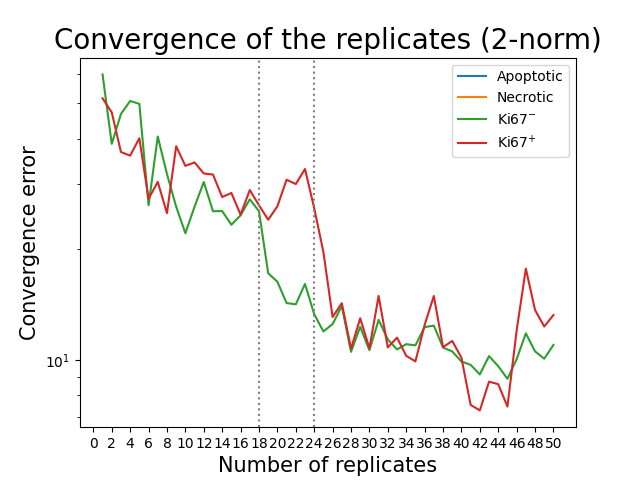

In [35]:
plt.clf()
plt.plot( replicates, apoptotic_conv , '-', label='Apoptotic', color='tab:blue', alpha=1.0 ); 
plt.plot( replicates, necrotic_conv , '-', label='Necrotic', color='tab:orange', alpha=1.0 );
if apoptotic_conv_replicate != -1:
    plt.axvline(apoptotic_conv_replicate, color='tab:gray', linestyle=':')
if necrotic_conv_replicate != -1:
    plt.axvline(necrotic_conv_replicate, color='tab:gray', linestyle=':')
if cycle_model == 0:
    plt.plot( replicates, Ki67_negative_conv , '-', label=r'Ki67$^{-}$', color='tab:green', alpha=1.0 );
    plt.plot( replicates, Ki67_positive_premitotic_conv , '-', label=r'Ki67$^{+}$ (pre)', color='tab:red', alpha=1.0 );
    plt.plot( replicates, Ki67_positive_postmitotic_conv , '-', label=r'Ki67$^{+}$ (post)', color='tab:purple', alpha=1.0 );
    
    if Ki67_negative_conv_replicate != -1:
        plt.axvline(Ki67_negative_conv_replicate, color='tab:gray', linestyle=':')
    if Ki67_positive_premitotic_conv_replicate != -1:
        plt.axvline(Ki67_positive_premitotic_conv_replicate, color='tab:gray', linestyle=':')
    if Ki67_positive_postmitotic_conv_replicate != -1:
        plt.axvline(Ki67_positive_postmitotic_conv_replicate, color='tab:gray', linestyle=':')
elif cycle_model == 1:
    plt.plot( replicates, Ki67_negative_conv , '-', label=r'Ki67$^{-}$', color='tab:green', alpha=1.0 );
    plt.plot( replicates, Ki67_positive_conv , '-', label=r'Ki67$^{+}$', color='tab:red', alpha=1.0 );
    
    if Ki67_negative_conv_replicate != -1:
        plt.axvline(Ki67_negative_conv_replicate, color='tab:gray', linestyle=':')
    if Ki67_positive_conv_replicate != -1:
        plt.axvline(Ki67_positive_conv_replicate, color='tab:gray', linestyle=':')
elif cycle_model == 2:
    plt.plot( replicates, G0G1_phase_conv , '-', label='G0/G1', color='tab:green', alpha=1.0 );
    plt.plot( replicates, S_phase_conv , '-', label='S', color='tab:red', alpha=1.0 );
    plt.plot( replicates, G2M_phase_conv , '-', label='G2/M', color='tab:purple', alpha=1.0 );
    
    if G0G1_phase_conv_replicate != -1:
        plt.axvline(G0G1_phase_conv_replicate, color='tab:gray', linestyle=':')
    if S_phase_conv_replicate != -1:
        plt.axvline(S_phase_conv_replicate, color='tab:gray', linestyle=':')
    if G2M_phase_conv_replicate != -1:
        plt.axvline(G2M_phase_conv_replicate, color='tab:gray', linestyle=':')
elif cycle_model == 5:
    plt.plot( replicates, live_conv , '-', label='Live', color='tab:green', alpha=1.0 );
    
    if live_conv_replicate != -1:
        plt.axvline(live_conv_replicate, color='tab:gray', linestyle=':')
elif cycle_model == 6:
    plt.plot( replicates, G0G1_phase_conv , '-', label='G0/G1', color='tab:green', alpha=1.0 );
    plt.plot( replicates, S_phase_conv , '-', label='S', color='tab:red', alpha=1.0 );
    plt.plot( replicates, G2_phase_conv , '-', label='G2', color='tab:purple', alpha=1.0 );
    plt.plot( replicates, M_phase_conv , '-', label='M', color='tab:brown', alpha=1.0 );
    
    if G0G1_phase_conv_replicate != -1:
        plt.axvline(G0G1_phase_conv_replicate, color='tab:gray', linestyle=':')
    if S_phase_conv_replicate != -1:
        plt.axvline(S_phase_conv_replicate, color='tab:gray', linestyle=':')
    if G2_phase_conv_replicate != -1:
        plt.axvline(G2_phase_conv_replicate, color='tab:gray', linestyle=':')
    if M_phase_conv_replicate != -1:
        plt.axvline(M_phase_conv_replicate, color='tab:gray', linestyle=':')
else:
    print("Unrecognized cell cycle model.")
plt.legend()

plt.title( 'Convergence of the replicates (2-norm)', size=20)
plt.xlabel( 'Number of replicates', size=15 ) 
plt.ylabel( 'Convergence error', size=15 )
plt.xticks( np.arange(0, max_num_replicates+1, 2) )
plt.yscale( 'log' )
plt.savefig(os.path.join(output_folder, "convergence_replicates_2norm.png"), bbox_inches = 'tight')

## Compute convergence of the replicates using max-norm

In [36]:
if cycle_model == 0:
    Ki67_negative_conv = np.zeros( max_num_replicates );
    Ki67_positive_premitotic_conv = np.zeros( max_num_replicates );
    Ki67_positive_postmitotic_conv = np.zeros( max_num_replicates );
elif cycle_model == 1:
    Ki67_negative_conv = np.zeros( max_num_replicates );
    Ki67_positive_conv = np.zeros( max_num_replicates );
elif cycle_model == 2:
    G0G1_phase_conv = np.zeros( max_num_replicates );
    S_phase_conv = np.zeros( max_num_replicates );
    G2M_phase_conv = np.zeros( max_num_replicates );
elif cycle_model == 5:
    live_conv = np.zeros( max_num_replicates );
elif cycle_model == 6:
    G0G1_phase_conv = np.zeros( max_num_replicates );
    S_phase_conv = np.zeros( max_num_replicates );
    G2_phase_conv = np.zeros( max_num_replicates );
    M_phase_conv = np.zeros( max_num_replicates );
else:
    print("Unrecognized cell cycle model.")
apoptotic_conv = np.zeros( max_num_replicates );
necrotic_conv = np.zeros( max_num_replicates );

for num_replicates in range(1, max_num_replicates+1):
    if cycle_model == 0:
        Ki67_negative_conv[num_replicates-1] = np.linalg.norm(Ki67_negative_mean[:,num_replicates-1] - true_solution[:,0], ord=np.inf);
        Ki67_positive_premitotic_conv[num_replicates-1] = np.linalg.norm(Ki67_positive_premitotic_mean[:,num_replicates-1] - true_solution[:,1], ord=np.inf);
        Ki67_positive_postmitotic_conv[num_replicates-1] = np.linalg.norm(Ki67_positive_postmitotic_mean[:,num_replicates-1] - true_solution[:,2], ord=np.inf);
    elif cycle_model == 1:
        Ki67_negative_conv[num_replicates-1] = np.linalg.norm(Ki67_negative_mean[:,num_replicates-1] - true_solution[:,0], ord=np.inf);
        Ki67_positive_conv[num_replicates-1] = np.linalg.norm(Ki67_positive_mean[:,num_replicates-1] - true_solution[:,1], ord=np.inf);
    elif cycle_model == 2:
        G0G1_phase_conv[num_replicates-1] = np.linalg.norm(G0G1_phase_mean[:,num_replicates-1] - true_solution[:,0], ord=np.inf);
        S_phase_conv[num_replicates-1] = np.linalg.norm(S_phase_mean[:,num_replicates-1] - true_solution[:,1], ord=np.inf);
        G2M_phase_conv[num_replicates-1] = np.linalg.norm(G2M_phase_mean[:,num_replicates-1] - true_solution[:,2], ord=np.inf);
    elif cycle_model == 5:
        live_conv[num_replicates-1] = np.linalg.norm(live_mean[:,num_replicates-1] - true_solution[:,0], ord=np.inf);
    elif cycle_model == 6:
        G0G1_phase_conv[num_replicates-1] = np.linalg.norm(G0G1_phase_mean[:,num_replicates-1] - true_solution[:,0], ord=np.inf);
        S_phase_conv[num_replicates-1] = np.linalg.norm(S_phase_mean[:,num_replicates-1] - true_solution[:,1], ord=np.inf);
        G2_phase_conv[num_replicates-1] = np.linalg.norm(G2_phase_mean[:,num_replicates-1] - true_solution[:,2], ord=np.inf);
        M_phase_conv[num_replicates-1] = np.linalg.norm(M_phase_mean[:,num_replicates-1] - true_solution[:,3], ord=np.inf);
    else:
        print("Unrecognized cell cycle model.")
    apoptotic_conv[num_replicates-1] = np.linalg.norm(apoptotic_mean[:,num_replicates-1] - apoptotic_mean[:,-1], ord=np.inf);
    necrotic_conv[num_replicates-1] = np.linalg.norm(necrotic_mean[:,num_replicates-1] - necrotic_mean[:,-1], ord=np.inf);

## Check convergence of the replicates using max-norm

In [69]:
replicates = np.arange(1, max_num_replicates+1)

def check_convergence(tumor_cell_conv, label, tol = 1.0e0):
    conv_replicate = -1
    for i in range(tumor_cell_conv.size-1, -1, -1):
        mean = np.mean(tumor_cell_conv[i:])
        if abs(mean - tumor_cell_conv[i]) > tol:
            conv_replicate = replicates[i]
            print(label + " converged at replicate=" + str(conv_replicate))
            break
    if conv_replicate == -1:
        print(label + " did not converge")
        
    return conv_replicate

In [70]:
apoptotic_conv_replicate = check_convergence(apoptotic_conv, 'Apoptotic');
necrotic_conv_replicate = check_convergence(necrotic_conv, 'Necrotic');
if cycle_model == 0:
    Ki67_negative_conv_replicate = check_convergence(Ki67_negative_conv, r'Ki67$^{-}$');
    Ki67_positive_premitotic_conv_replicate = check_convergence(Ki67_positive_premitotic_conv, r'Ki67$^{+}$ (pre)');
    Ki67_positive_postmitotic_conv_replicate = check_convergence(Ki67_positive_postmitotic_conv, r'Ki67$^{+}$ (post)');
elif cycle_model == 1:
    Ki67_negative_conv_replicate = check_convergence(Ki67_negative_conv, r'Ki67$^{-}$');
    Ki67_positive_conv_replicate = check_convergence(Ki67_positive_conv, r'Ki67$^{+}$');
elif cycle_model == 2:
    G0G1_phase_conv_replicate = check_convergence(G0G1_phase_conv, 'G0/G1');
    S_phase_conv_replicate = check_convergence(S_phase_conv, 'S');
    G2M_phase_conv_replicate = check_convergence(G2M_phase_conv, 'G2/M');
elif cycle_model == 5:
    live_conv_replicate = check_convergence(live_conv, 'Live');
elif cycle_model == 6:
    G0G1_phase_conv_replicate = check_convergence(G0G1_phase_conv, 'G0/G1');
    S_phase_conv_replicate = check_convergence(S_phase_conv, 'S');
    G2_phase_conv_replicate = check_convergence(G2_phase_conv, 'G2');
    M_phase_conv_replicate = check_convergence(M_phase_conv, 'M');
else:
    print("Unrecognized cell cycle model.")

Apoptotic did not converge
Necrotic did not converge
Ki67$^{-}$ converged at replicate=23
Ki67$^{+}$ converged at replicate=37


## Plot convergence of the replicates using max-norm

<IPython.core.display.Javascript object>


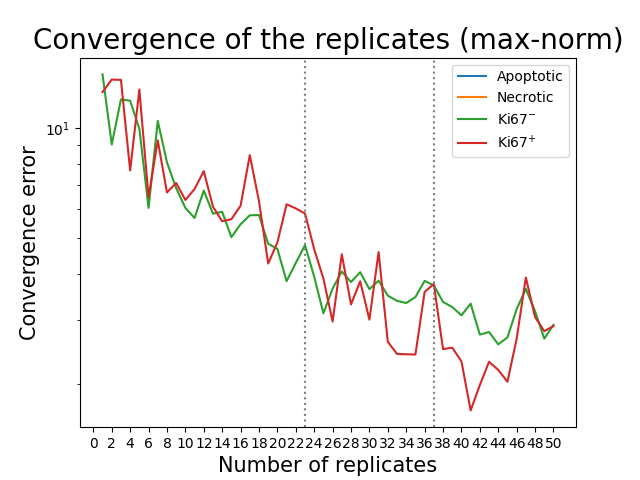

In [71]:
plt.clf()
plt.plot( replicates, apoptotic_conv , '-', label='Apoptotic', color='tab:blue', alpha=1.0 ); 
plt.plot( replicates, necrotic_conv , '-', label='Necrotic', color='tab:orange', alpha=1.0 ); 
if apoptotic_conv_replicate != -1:
    plt.axvline(apoptotic_conv_replicate, color='tab:gray', linestyle=':')
if necrotic_conv_replicate != -1:
    plt.axvline(necrotic_conv_replicate, color='tab:gray', linestyle=':')
if cycle_model == 0:
    plt.plot( replicates, Ki67_negative_conv , '-', label=r'Ki67$^{-}$', color='tab:green', alpha=1.0 );
    plt.plot( replicates, Ki67_positive_premitotic_conv , '-', label=r'Ki67$^{+}$ (pre)', color='tab:red', alpha=1.0 );
    plt.plot( replicates, Ki67_positive_postmitotic_conv , '-', label=r'Ki67$^{+}$ (post)', color='tab:purple', alpha=1.0 );
    
    if Ki67_negative_conv_replicate != -1:
        plt.axvline(Ki67_negative_conv_replicate, color='tab:gray', linestyle=':')
    if Ki67_positive_premitotic_conv_replicate != -1:
        plt.axvline(Ki67_positive_premitotic_conv_replicate, color='tab:gray', linestyle=':')
    if Ki67_positive_postmitotic_conv_replicate != -1:
        plt.axvline(Ki67_positive_postmitotic_conv_replicate, color='tab:gray', linestyle=':')
elif cycle_model == 1:
    plt.plot( replicates, Ki67_negative_conv , '-', label=r'Ki67$^{-}$', color='tab:green', alpha=1.0 );
    plt.plot( replicates, Ki67_positive_conv , '-', label=r'Ki67$^{+}$', color='tab:red', alpha=1.0 );
    
    if Ki67_negative_conv_replicate != -1:
        plt.axvline(Ki67_negative_conv_replicate, color='tab:gray', linestyle=':')
    if Ki67_positive_conv_replicate != -1:
        plt.axvline(Ki67_positive_conv_replicate, color='tab:gray', linestyle=':')
elif cycle_model == 2:
    plt.plot( replicates, G0G1_phase_conv , '-', label='G0/G1', color='tab:green', alpha=1.0 );
    plt.plot( replicates, S_phase_conv , '-', label='S', color='tab:red', alpha=1.0 );
    plt.plot( replicates, G2M_phase_conv , '-', label='G2/M', color='tab:purple', alpha=1.0 );
    
    if G0G1_phase_conv_replicate != -1:
        plt.axvline(G0G1_phase_conv_replicate, color='tab:gray', linestyle=':')
    if S_phase_conv_replicate != -1:
        plt.axvline(S_phase_conv_replicate, color='tab:gray', linestyle=':')
    if G2M_phase_conv_replicate != -1:
        plt.axvline(G2M_phase_conv_replicate, color='tab:gray', linestyle=':')
elif cycle_model == 5:
    plt.plot( replicates, live_conv , '-', label='Live', color='tab:green', alpha=1.0 );
    
    if live_conv_replicate != -1:
        plt.axvline(live_conv_replicate, color='tab:gray', linestyle=':')
elif cycle_model == 6:
    plt.plot( replicates, G0G1_phase_conv , '-', label='G0/G1', color='tab:green', alpha=1.0 );
    plt.plot( replicates, S_phase_conv , '-', label='S', color='tab:red', alpha=1.0 );
    plt.plot( replicates, G2_phase_conv , '-', label='G2', color='tab:purple', alpha=1.0 );
    plt.plot( replicates, M_phase_conv , '-', label='M', color='tab:brown', alpha=1.0 );
    
    if G0G1_phase_conv_replicate != -1:
        plt.axvline(G0G1_phase_conv_replicate, color='tab:gray', linestyle=':')
    if S_phase_conv_replicate != -1:
        plt.axvline(S_phase_conv_replicate, color='tab:gray', linestyle=':')
    if G2_phase_conv_replicate != -1:
        plt.axvline(G2_phase_conv_replicate, color='tab:gray', linestyle=':')
    if M_phase_conv_replicate != -1:
        plt.axvline(M_phase_conv_replicate, color='tab:gray', linestyle=':')
else:
    print("Unrecognized cell cycle model.")
plt.legend()

plt.title( 'Convergence of the replicates (max-norm)', size=20)
plt.xlabel( 'Number of replicates', size=15 ) 
plt.ylabel( 'Convergence error', size=15 )
plt.xticks( np.arange(0, max_num_replicates+1, 2) )
plt.yscale( 'log' )
plt.savefig(os.path.join(output_folder, "convergence_replicates_maxnorm.png"), bbox_inches = 'tight')